Instalação de pacotes

In [ ]:
pip install networkx matplotlib scipy pydot numpy --quiet

In [25]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_uppercase
plt.rcParams.update({'font.size': 14})

# 2. Cálculo do grau

## Rede não direcionada

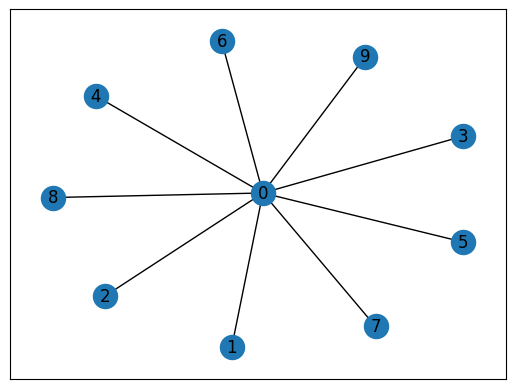

In [2]:
G = nx.star_graph(9)
nx.draw_networkx(G)

In [3]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [4]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)])

Dicionário com o grau de cada nó:

In [5]:
G.degree

DegreeView({0: 9, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [6]:
G.degree[0]

9

In [7]:
G.degree[1]

1

In [8]:
for node, degree in G.degree:
    print(f'Nó: {node}, grau: {degree}')

Nó: 0, grau: 9
Nó: 1, grau: 1
Nó: 2, grau: 1
Nó: 3, grau: 1
Nó: 4, grau: 1
Nó: 5, grau: 1
Nó: 6, grau: 1
Nó: 7, grau: 1
Nó: 8, grau: 1
Nó: 9, grau: 1


In [ ]:
for node, degree in G.degree:
    if degree > 1:
        print(f'Nó: {node}, grau: {degree}')

In [9]:
list(G.adj[0])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
list(G.adj[1])

[0]

## Rede direcionada

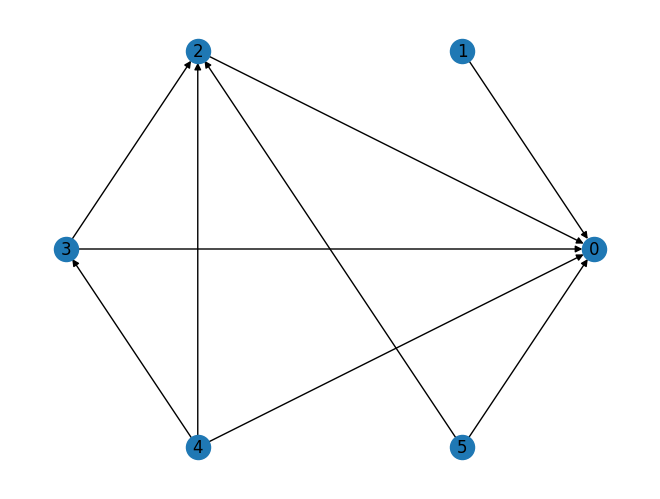

In [11]:
G = nx.gnc_graph(6)
nx.draw_circular(G, with_labels=True)

In [12]:
G.degree(0)

5

In [13]:
G.in_degree(0)

5

In [14]:
G.out_degree(0)

0

Lista de adjacências vazia:

In [18]:
G.adj[0]

AtlasView({})

Lista com *antecessores*

In [14]:
G.pred[0]

AtlasView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}})

In [10]:
G.degree(2)

4

In [8]:
G.in_degree(2)

3

In [9]:
G.out_degree(2)

1

Tamanho da lista de adjacências igual ao nó de saída:

In [19]:
G.adj[2]

AtlasView({0: {}})

## Rede com pesos

In [26]:
G = nx.path_graph(range(5))
nx.set_edge_attributes(G, 1, 'weight')
G.add_edge(2, 4, weight=2)
G[2][3]['weight'] = 2

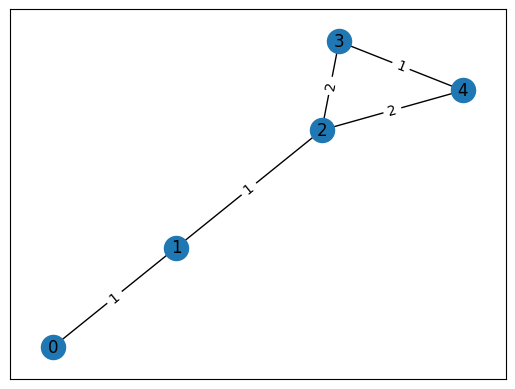

In [29]:
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

Precisamos informar o atributo que guarda os pesos:

In [31]:
G.degree(2, weight='weight')

5

In [32]:
G.degree(3, weight='weight')

3

In [33]:
G.degree(0, weight='weight')

1

# 3. Estatísticas de grau

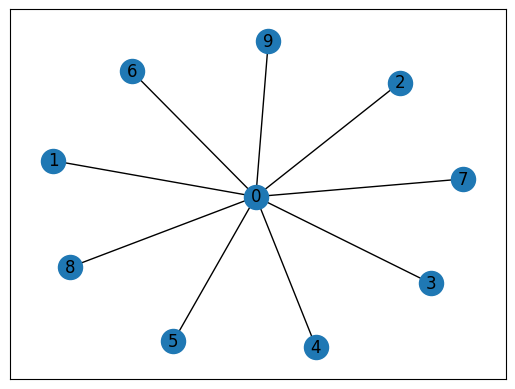

In [15]:
G = nx.star_graph(9)
nx.draw_networkx(G)

Gerando lista de graus:

In [16]:
degree_list = []
for node, degree in G.degree:
    degree_list.append(degree)
degree_list

[9, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Usando *list comprehension*:

In [17]:
degree_list = [degree for node, degree in G.degree]
degree_list

[9, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Calculando estatísticas:

In [18]:
max(degree_list)

9

In [19]:
min(degree_list)

1

In [20]:
mean = sum(degree_list) / len(degree_list)
mean

1.8

Usando `numpy`:

In [21]:
np.mean(degree_list)

1.8

Conferindo com grafo completo:

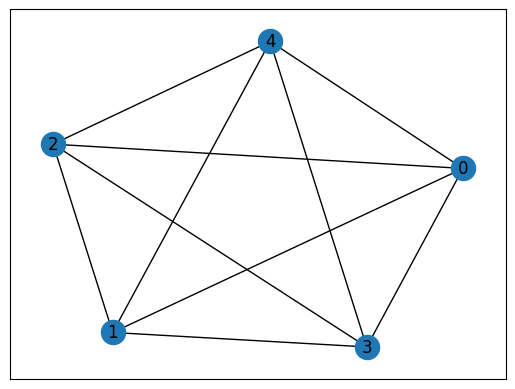

In [22]:
G = nx.complete_graph(5)
nx.draw_networkx(G)

In [23]:
degree_list = [degree for node, degree in G.degree]
max(degree_list), min(degree_list), np.mean(degree_list)

(4, 4, 4.0)

Mais um truque: calculando com `Pandas`:

In [26]:
degree_series = pd.Series(degree_list)
degree_series.describe()

count    5.0
mean     4.0
std      0.0
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
dtype: float64

# 4. Distribuição empírica

Rede completa:

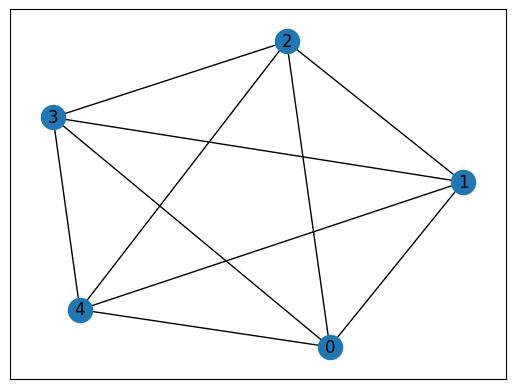

In [27]:
G = nx.complete_graph(5)
nx.draw_networkx(G)

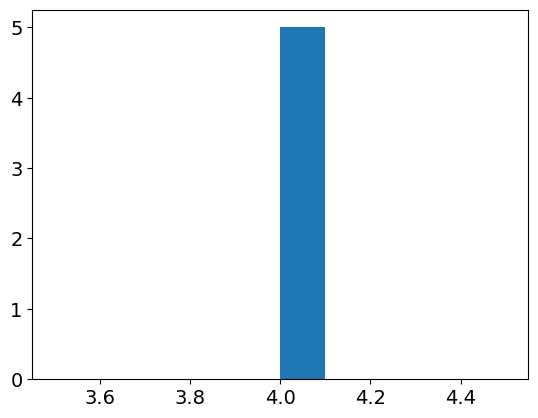

In [28]:
degree_list = [degree for node, degree in G.degree]
plt.hist(degree_list);

O índice indica o valor do grau:

In [29]:
nx.degree_histogram(G)

[0, 0, 0, 0, 5]

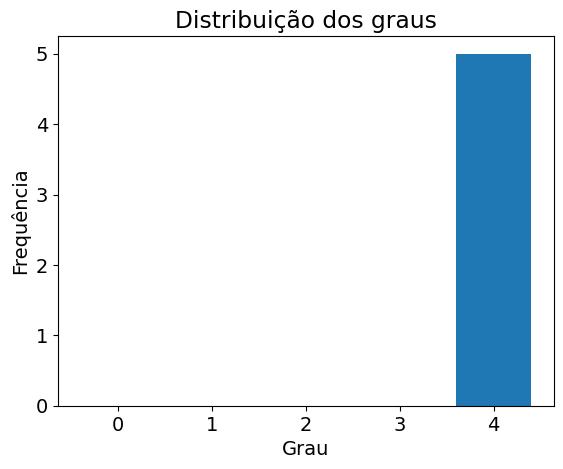

In [30]:
y = nx.degree_histogram(G)
x = range(len(y))
plt.bar(x, y)
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Distribuição dos graus');

 Transformando em uma função:

In [31]:
def plot_degree(g):
    y = nx.degree_histogram(g)
    x = range(len(y))
    plt.bar(x, y)
    plt.xlabel('Grau')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos graus')

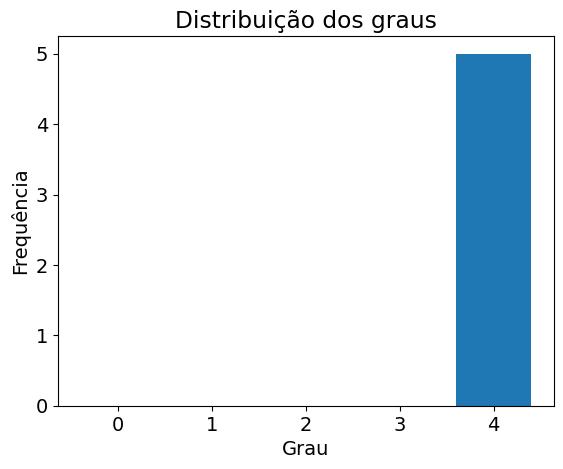

In [32]:
plot_degree(G)

Testando com outras redes:

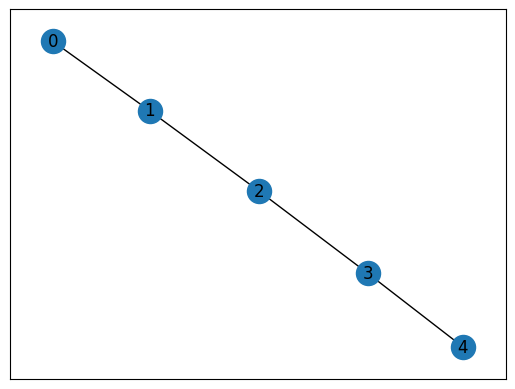

In [33]:
G = nx.path_graph(5)
nx.draw_networkx(G)

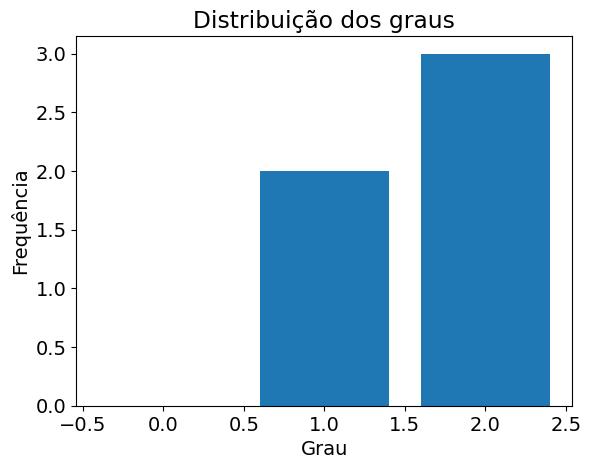

In [34]:
plot_degree(G)

Variante usando `Pandas`:

In [37]:
def plot_degree2(g):
    degree_list = [degree for node, degree in g.degree]
    degree_series = pd.Series(degree_list)
    degree_series.hist()
    plt.xlabel('Grau')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos graus')

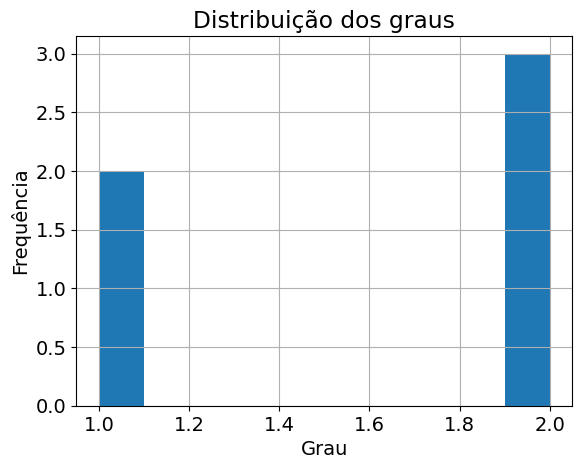

In [38]:
plot_degree2(G)

## Gráfico de ranqueamento (*rank plot*)

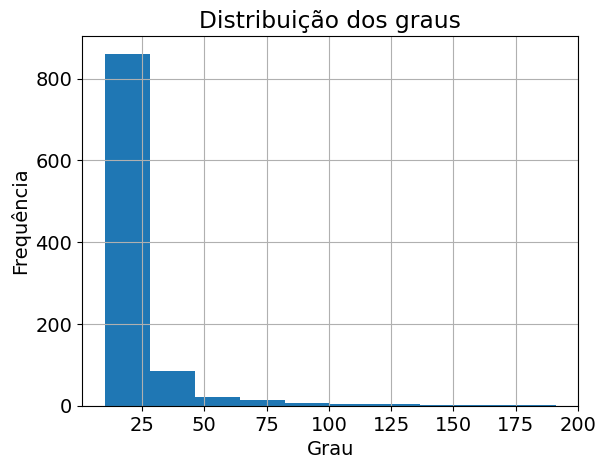

In [39]:
G = nx.barabasi_albert_graph(1000, 10, seed=42)
plot_degree2(G)

Gerando lista ordenada de graus:

In [40]:
degree_list = [degree for node, degree in G.degree]
sorted_degree_list = sorted(degree_list, reverse=True)
sorted_degree_list[:10]

[191, 170, 150, 136, 134, 126, 121, 119, 117, 105]

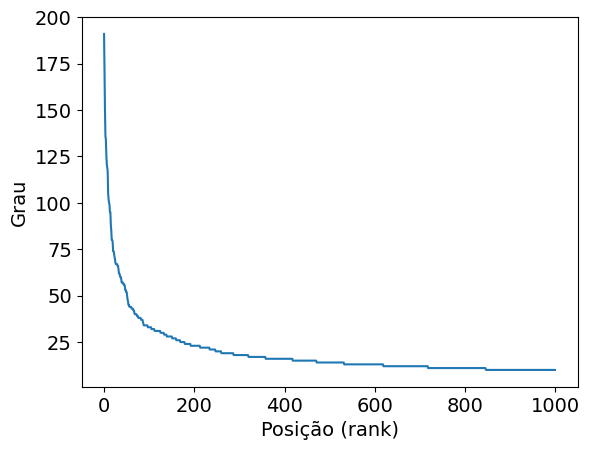

In [41]:
y = sorted_degree_list
x = range(len(y))
plt.plot(x, y)
plt.xlabel('Posição (rank)')
plt.ylabel('Grau');

Agora em escala logarítmica:

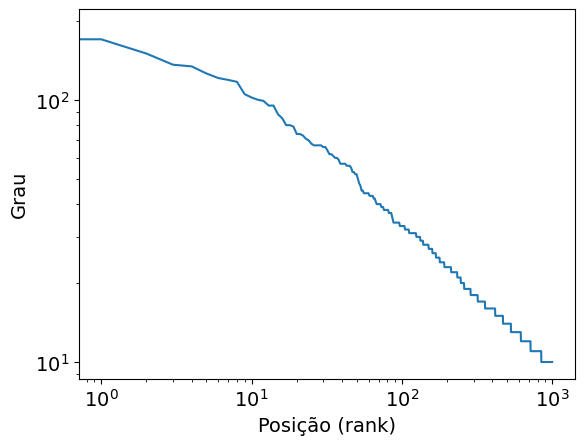

In [42]:
plt.plot(x, y)
plt.xlabel('Posição (rank)')
plt.ylabel('Grau')
plt.loglog();

Criando função:

In [46]:
def plot_rank(g, log=False):
    degree_list = [degree for node, degree in g.degree]
    y = sorted(degree_list, reverse=True)
    x = range(len(y))
    plt.plot(x, y)
    plt.xlabel('Posição (rank)')
    plt.ylabel('Grau')
    if log:
        plt.loglog()

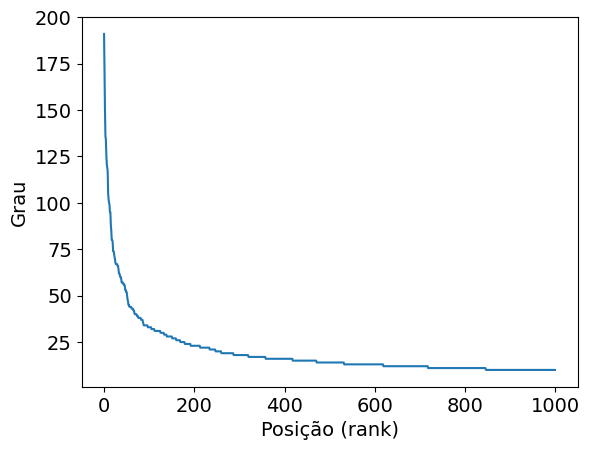

In [47]:
plot_rank(G)

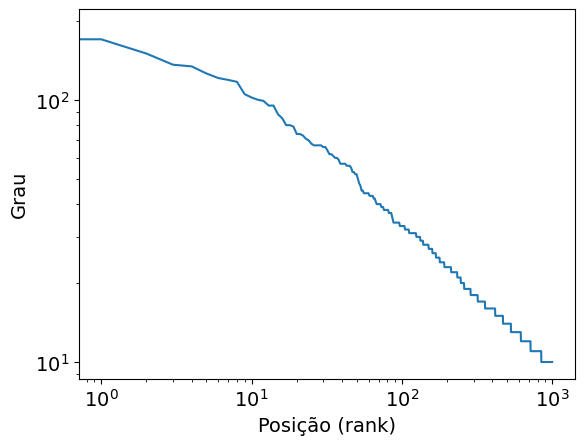

In [48]:
plot_rank(G, log=True)

# 5. Exemplos com NetworkX

## Clube de karatê
Zachary, Wayne W. “An Information Flow Model for Conflict and Fission in Small Groups.” Journal of Anthropological Research, 33, 452–473, (1977).

In [49]:
G = nx.karate_club_graph()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


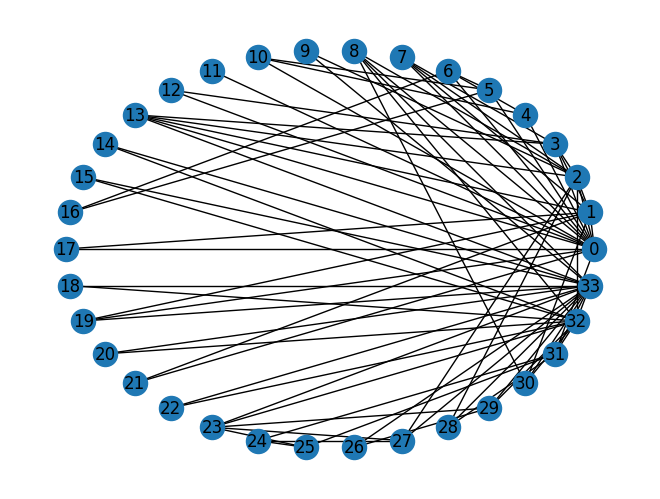

In [50]:
nx.draw_circular(G, with_labels=True)

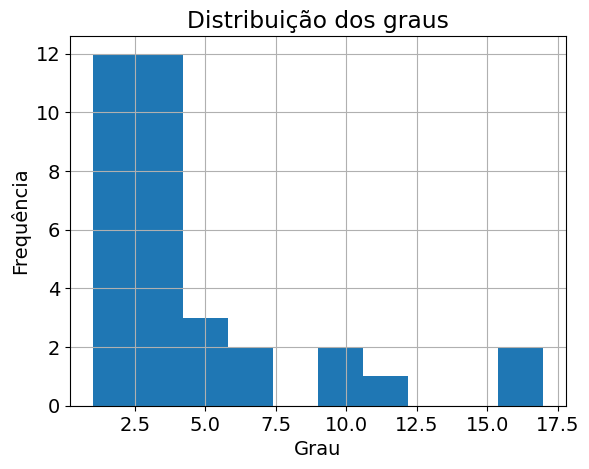

In [52]:
plot_degree2(G)

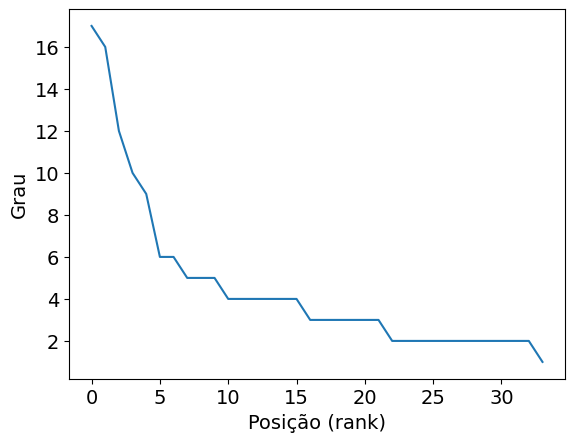

In [53]:
plot_rank(G)

## Sistemas autônomos da Internet
A. Elmokashfi, A. Kvalbein and C. Dovrolis, “On the Scalability of BGP: The Role of Topology Growth,” in IEEE Journal on Selected Areas in Communications, vol. 28, no. 8, pp. 1250-1261, October 2010.

In [68]:
G = nx.random_internet_as_graph(5000, seed=42)
print(G)

Graph with 5000 nodes and 9980 edges


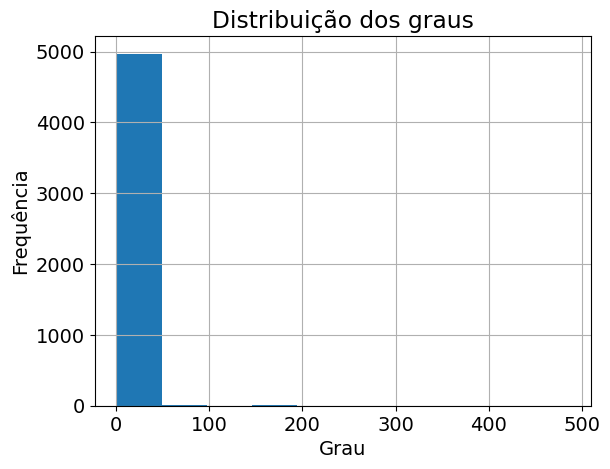

In [69]:
plot_degree2(G)

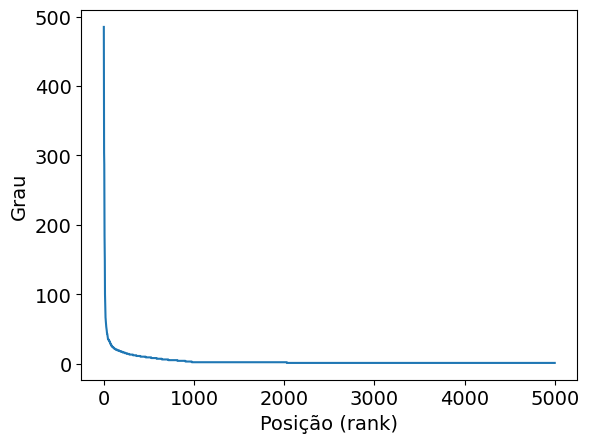

In [70]:
plot_rank(G)

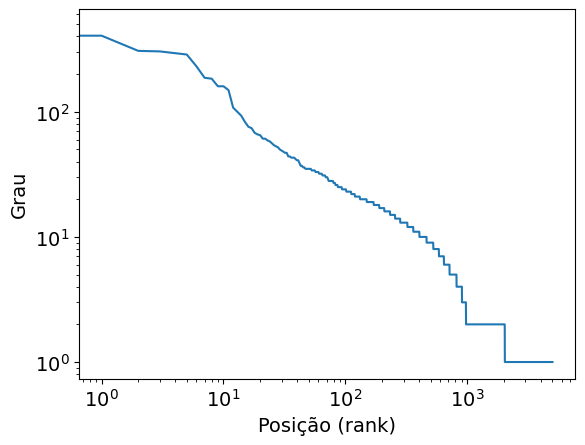

In [71]:
plot_rank(G, log=True)

## *Les Misérables*
D. E. Knuth, 1993. The Stanford GraphBase: a platform for combinatorial computing, pp. 74-87. New York: ACM Press.

In [75]:
G = nx.les_miserables_graph()
print(G)

Graph with 77 nodes and 254 edges


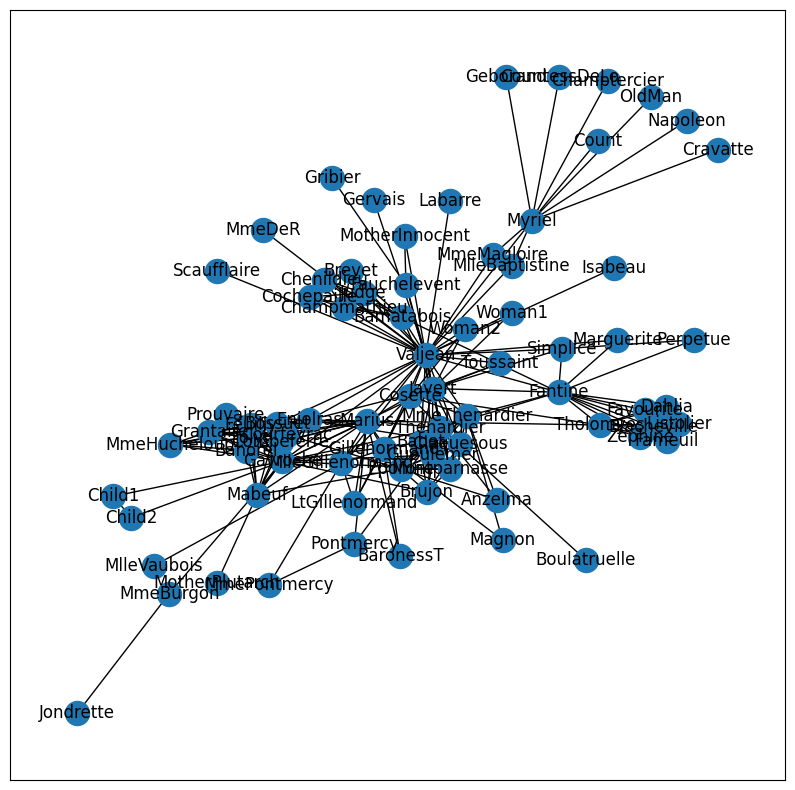

In [76]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(G)

Número de personagens com os quais interagiu:

In [77]:
G.degree('Valjean')

36

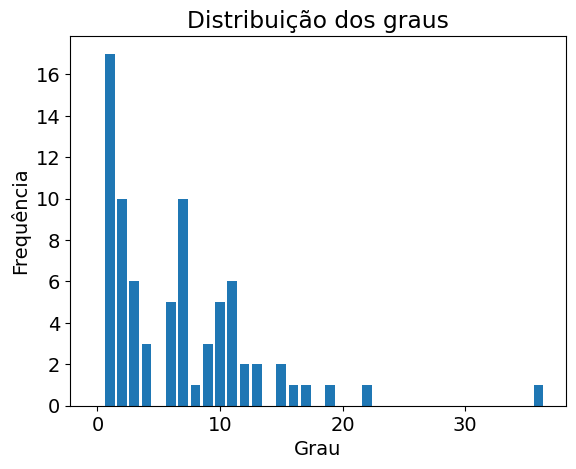

In [78]:
plot_degree(G)

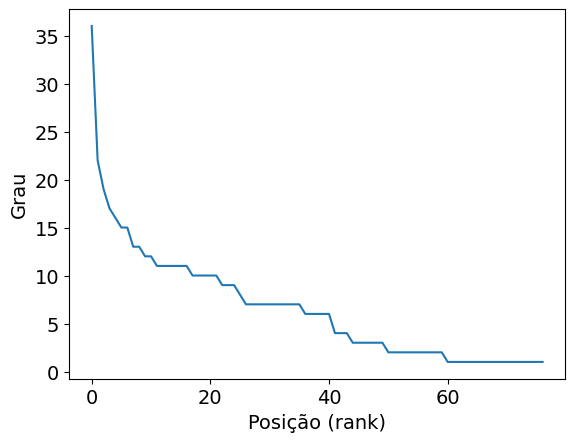

In [79]:
plot_rank(G)

Peso indica o número de interações com cada personagem:

In [80]:
G.degree('Valjean', weight='weight')

158

Modificando função para incluir pesos:

In [81]:
def plot_rank(g, log=False, weight=''):
    degree_list = [degree for node, degree in g.degree(weight=weight)]
    y = sorted(degree_list, reverse=True)
    x = range(len(y))
    plt.plot(x, y)
    plt.xlabel('Posição (rank)')
    plt.ylabel('Grau')
    if log:
        plt.loglog()

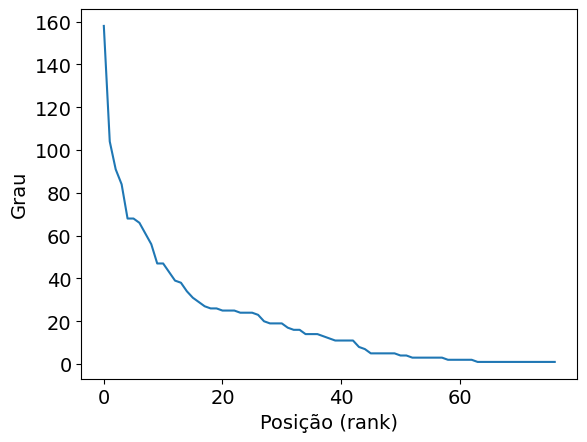

In [82]:
plot_rank(G, weight='weight')